# Notebook to demonstrate multiscale cleaning on the canonical "M31" source.

We simulate some VLA data for M31 and then use msclean to restore it.

In [1]:
%matplotlib inline

import sys, os 
print(os.path.abspath('.'))
sys.path.append(os.path.join('..','..')) 

import pylab
pylab.rcParams['figure.figsize'] = (12.0, 12.0)
pylab.rcParams['image.cmap'] = 'rainbow'

import numpy
import scipy
import scipy.special

from matplotlib import pylab
from matplotlib import pyplot as plt

import pyfits

from crocodile.synthesis import *
from crocodile.simulate import *
from util.visualize import *
from msclean import *

/Users/timcornwell/Code/crocodile/examples/tim


Now generate and plot the uvw coordinates

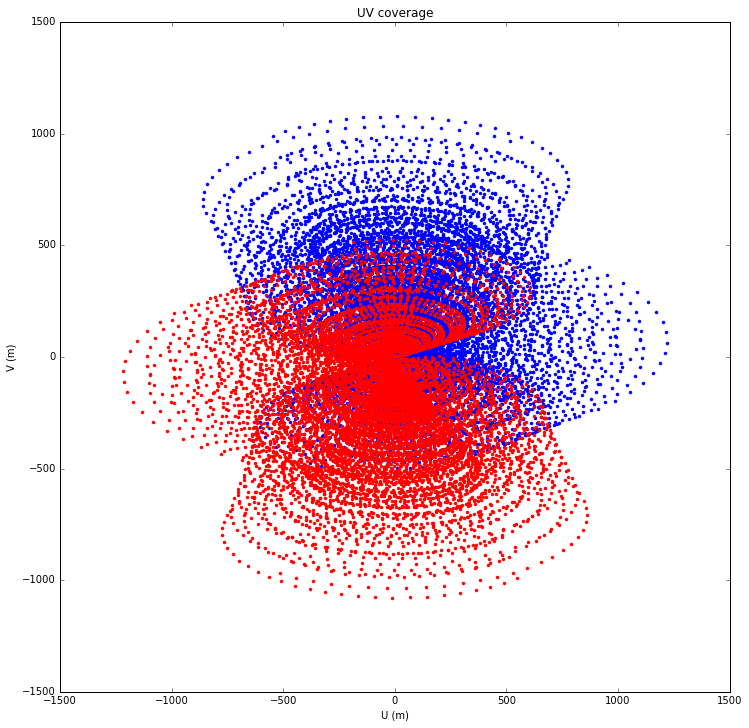

In [2]:
vlas=numpy.genfromtxt("../../data/vis/VLA_A_hor_xyz.txt", delimiter=",") 
vlas_xyz = xyz_at_latitude(vlas, numpy.pi*34.0784/180.0)/30.0 
uvw=xyz_to_baselines(vlas_xyz, 
numpy.arange(-numpy.pi/2.0, +numpy.pi/2.0,0.1), 
numpy.pi/8)
plt.clf()
plt.plot(uvw[:,0],uvw[:,1], '.')
plt.plot(-uvw[:,0],-uvw[:,1], '.', color='red')
plt.xlabel('U (m)')
plt.ylabel('V (m)')
plt.title('UV coverage')

Next get the M31 model from the crocodile data directory

/Users/timcornwell/env/lib/python3.5/site-packages/pyfits/hdu/hdulist.py:848: VerifyWarning: Error validating header for HDU #1 (note: PyFITS uses zero-based indexing).
    'ascii' codec can't decode byte 0x88 in position 0: ordinal not in range(128)
There may be extra bytes after the last HDU or the file is corrupted.
  (len(hdulist), indent(str(exc))), VerifyWarning)


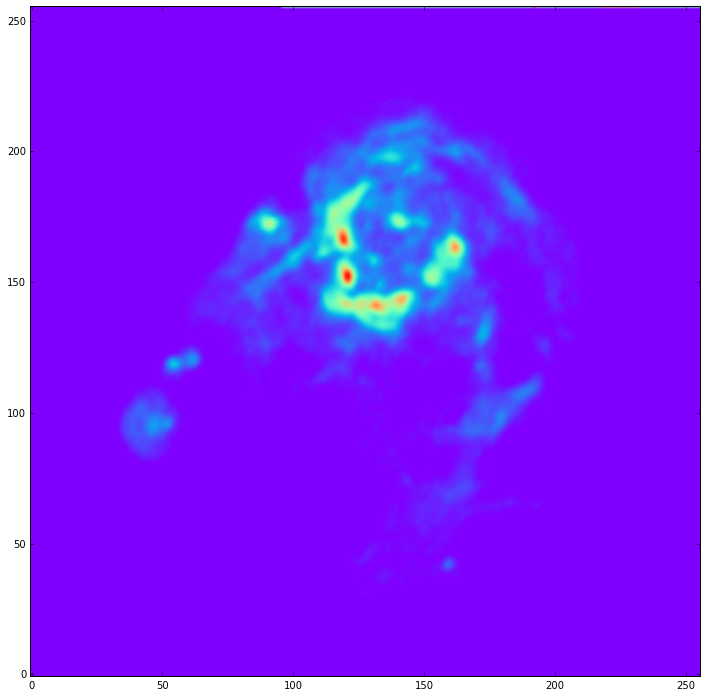

In [3]:
m31model='../../data/models/M31.MOD'
hdulist = pyfits.open(m31model)
m31image=numpy.array(hdulist[0].data)
plt.clf()
plt.imshow(m31image, cmap='rainbow', origin='lower')
plt.show()

Calculate the visibility for m31 using wslicfwd

In [4]:
lam=4.0*numpy.abs(uvw).max()
cell=1.0/lam
theta=256*cell

print("Field of view = %.2f degrees, maximum baseline %.3f (m)" % (theta*180.0/numpy.pi, lam))
pointimage=m31image.copy()
pointimage[225,75]+=2.0
pointimage[25,100]+=4.0
uvwsort,vobs=dopredict(theta, lam, p=uvw, modelimage=m31image, predfn=wslicfwd)

Field of view = 3.01 degrees, maximum baseline 4870.368 (m)


Plot the visibility as a function of uv distance

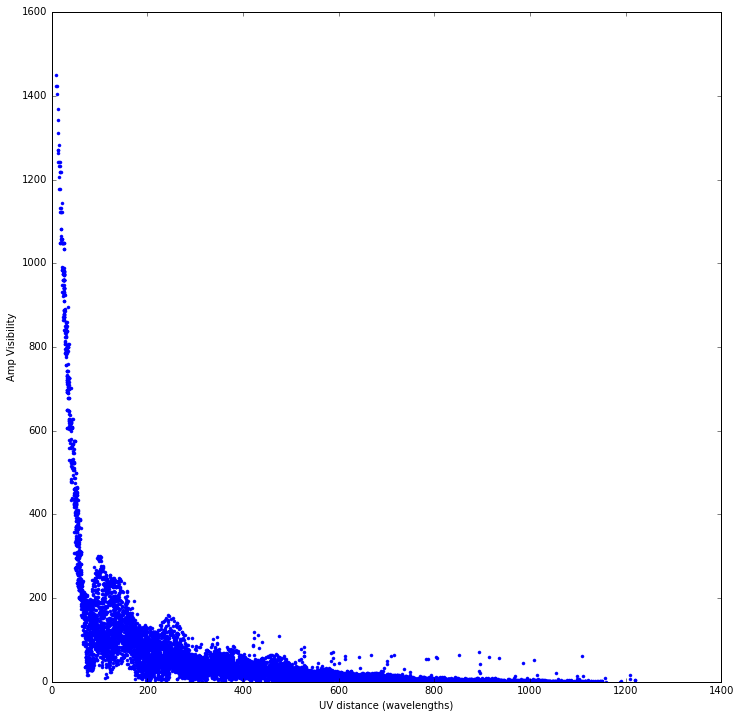

In [5]:
uvdist=numpy.sqrt(uvwsort[:,0]*uvwsort[:,0]+uvwsort[:,1]*uvwsort[:,1])
plt.clf()
plt.plot(uvdist, numpy.abs(vobs), '.')
plt.xlabel('UV distance (wavelengths)')
plt.ylabel('Amp Visibility')
plt.show()

Next we make the dirty image and psf to check if it looks plausible

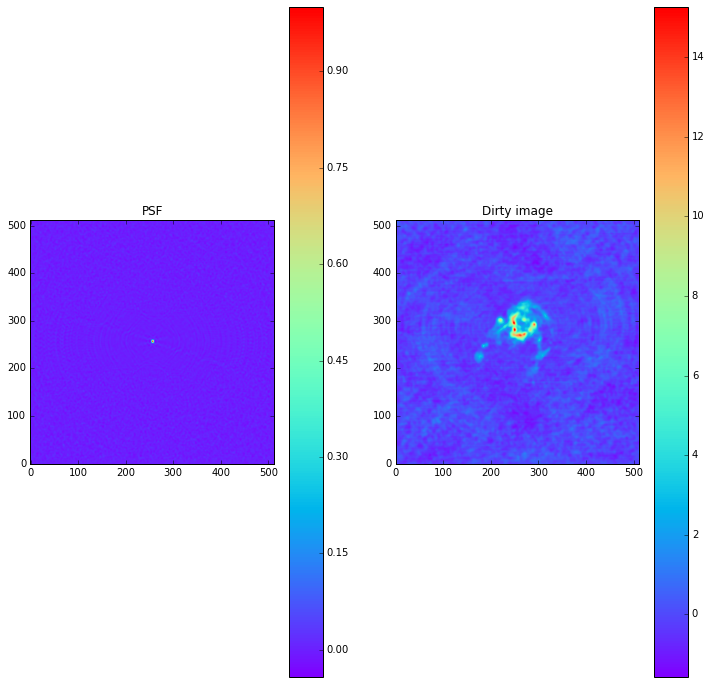

In [6]:
d,p=doimg(2.0*theta, lam, uvwsort, vobs, wslicimg)
plt.clf()
plt.subplot(1,2,1)
plt.imshow(p, cmap='rainbow', origin='lower')
plt.title('PSF')
c=plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(d, cmap='rainbow', origin='lower')
plt.title('Dirty image')
c=plt.colorbar()



Now we can do the deconvolution

Start of major cycle 0
Peak of PSF = 1.0 at (256, 256)
Peak of Dirty = 15.2544492418 at (280, 249)
Coupling matrix =
 [[ 1.          0.90103941  0.42579056  0.06085272]
 [ 0.90103941  0.81851015  0.40781147  0.06062136]
 [ 0.42579056  0.40781147  0.28501974  0.05855841]
 [ 0.06085272  0.06062136  0.05855841  0.03997746]]
Max abs in dirty image = 15.254449
Start of minor cycle
This minor cycle will stop at 100 iterations or peak < 1.52544492418
Minor cycle 0, peak [ 9.44361173  9.40033072  9.19248628  8.16560513] at [272, 255, 3]
Minor cycle 1, peak [ 11.95173031  11.8600483   11.11140191   7.23105063] at [299, 246, 3]
Minor cycle 2, peak [ 8.25104931  8.19789974  7.88756417  5.73545478] at [286, 285, 3]
Minor cycle 3, peak [ 10.0487131    9.87501488   8.64860309   4.34057321] at [268, 269, 3]
Minor cycle 4, peak [ 2.96936707  2.99497604  3.20528171  3.82184278] at [317, 261, 3]
Minor cycle 5, peak [ 3.78033534  3.82640612  4.09852999  3.49922137] at [284, 243, 3]
Minor cycle 6, peak [ 

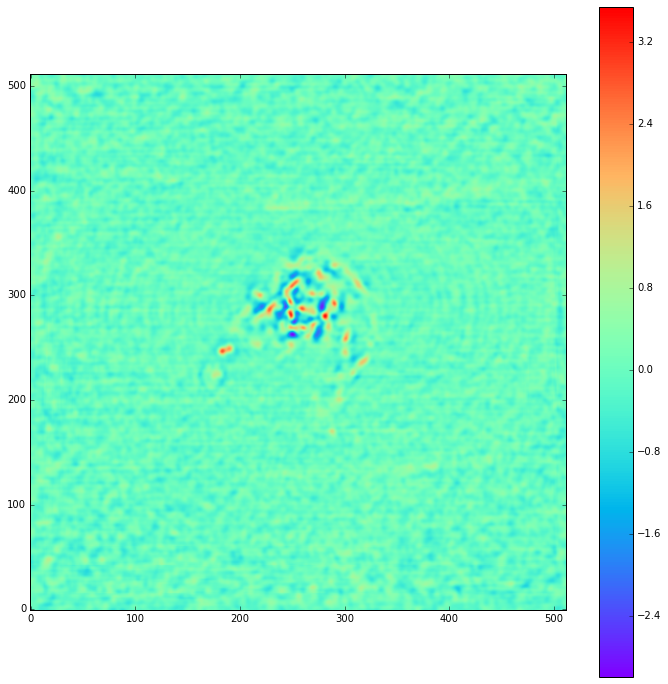

End of major cycle
Start of major cycle 1
Peak of PSF = 1.0 at (256, 256)
Peak of Dirty = 3.48044619268 at (280, 281)
Coupling matrix =
 [[ 1.          0.90103941  0.42579056  0.06085272]
 [ 0.90103941  0.81851015  0.40781147  0.06062136]
 [ 0.42579056  0.40781147  0.28501974  0.05855841]
 [ 0.06085272  0.06062136  0.05855841  0.03997746]]
Max abs in dirty image = 3.480446
Start of minor cycle
This minor cycle will stop at 100 iterations or peak < 0.348044619268
Minor cycle 0, peak [ 1.01538324  0.99388142  0.89028181  0.65160363] at [20, 75, 3]
Minor cycle 1, peak [ 0.52204486  0.54320117  0.63386619  0.49929245] at [17, 458, 3]
Minor cycle 2, peak [ 0.68264789  0.6846839   0.68560146  0.42691306] at [22, 491, 3]
Minor cycle 3, peak [-0.61297407 -0.61292661 -0.57378427 -0.39929579] at [16, 273, 3]
Minor cycle 4, peak [ 0.66249847  0.64360827  0.55902921  0.3715333 ] at [14, 110, 3]
Minor cycle 5, peak [ 0.51159449  0.49870347  0.44707087  0.33889855] at [42, 75, 3]
Minor cycle 6, peak

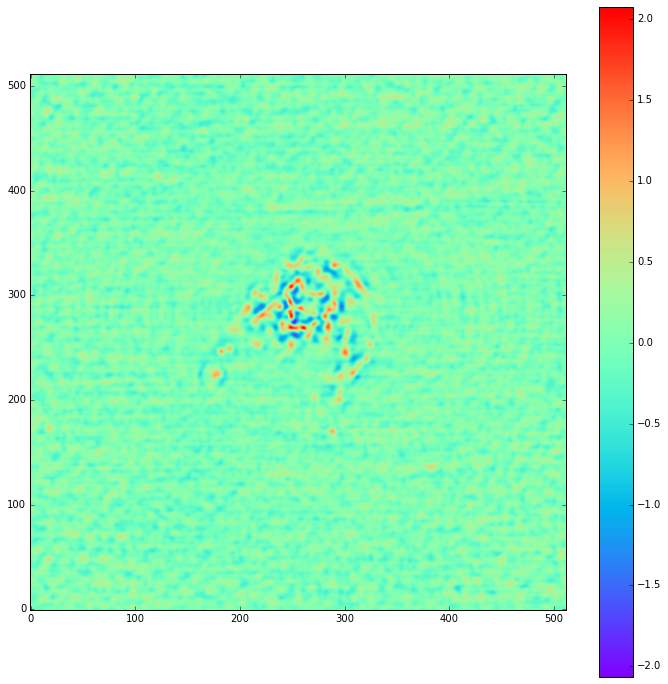

End of major cycle
Start of major cycle 2
Peak of PSF = 1.0 at (256, 256)
Peak of Dirty = 2.14920048708 at (280, 249)
Coupling matrix =
 [[ 1.          0.90103941  0.42579056  0.06085272]
 [ 0.90103941  0.81851015  0.40781147  0.06062136]
 [ 0.42579056  0.40781147  0.28501974  0.05855841]
 [ 0.06085272  0.06062136  0.05855841  0.03997746]]
Max abs in dirty image = 2.149200
Start of minor cycle
This minor cycle will stop at 100 iterations or peak < 0.214920048708
Minor cycle 0, peak [ 0.43558447  0.43301102  0.40452491  0.15629598] at [271, 194, 3]
Minor cycle 1, peak [ 1.92000847  1.81107415  1.1063569   0.0541872 ] at [282, 248, 2]
Minor cycle 2, peak [ 0.92597606  0.86895727  0.51540606  0.15459218] at [288, 227, 3]
Minor cycle 3, peak [-0.00910993 -0.02865838 -0.13664994 -0.15124024] at [251, 312, 3]
Minor cycle 4, peak [-1.40568198 -1.36675163 -1.05703616  0.0106018 ] at [288, 219, 2]
Minor cycle 5, peak [-0.86426831 -0.79779996 -0.36554935  0.19741527] at [284, 216, 3]
Minor cycle

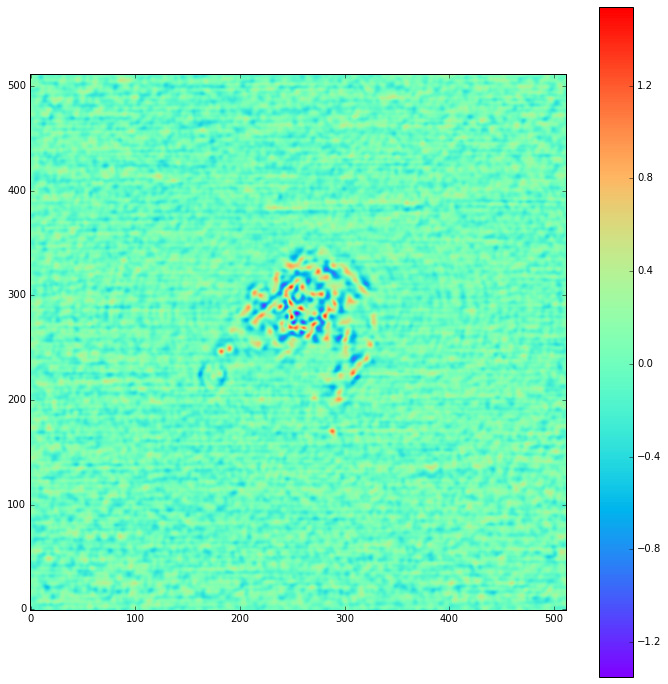

End of major cycle
Start of major cycle 3
Peak of PSF = 1.0 at (256, 256)
Peak of Dirty = 1.54296302955 at (279, 249)
Coupling matrix =
 [[ 1.          0.90103941  0.42579056  0.06085272]
 [ 0.90103941  0.81851015  0.40781147  0.06062136]
 [ 0.42579056  0.40781147  0.28501974  0.05855841]
 [ 0.06085272  0.06062136  0.05855841  0.03997746]]
Max abs in dirty image = 1.542963
Start of minor cycle
This minor cycle will stop at 100 iterations or peak < 0.154296302955
Minor cycle 0, peak [ 0.2997176   0.2853209   0.23097152  0.10345901] at [30, 72, 3]
Minor cycle 1, peak [ 0.14438098  0.13827408  0.11116418  0.09728161] at [214, 401, 3]
Minor cycle 2, peak [ 0.36812438  0.34518843  0.23849992  0.09720015] at [141, 491, 3]
Minor cycle 3, peak [-1.10892569 -1.05744514 -0.6829194  -0.02651148] at [290, 222, 2]
Minor cycle 4, peak [-0.51632154 -0.47765665 -0.22635322  0.10313703] at [284, 216, 3]
Minor cycle 5, peak [ 0.7353834   0.69390453  0.44294977  0.09672414] at [251, 324, 3]
Minor cycle 6

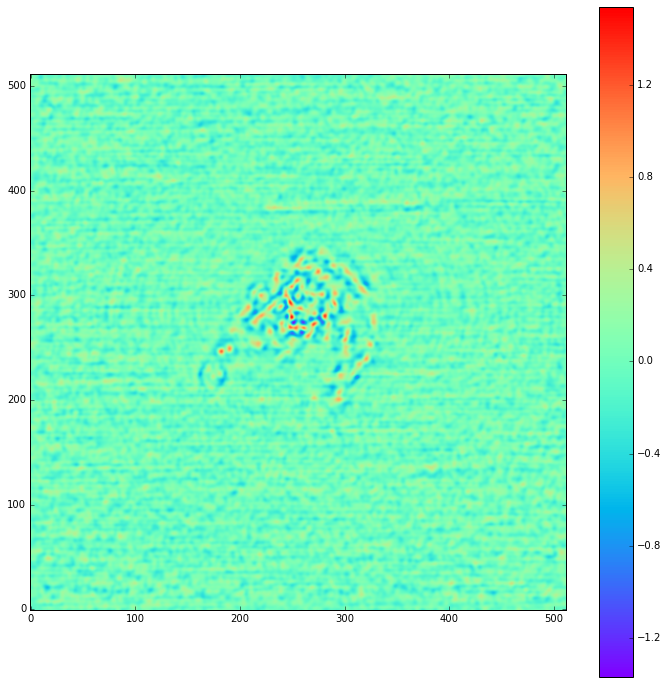

End of major cycle
Start of major cycle 4
Peak of PSF = 1.0 at (256, 256)
Peak of Dirty = 1.53403958121 at (279, 249)
Coupling matrix =
 [[ 1.          0.90103941  0.42579056  0.06085272]
 [ 0.90103941  0.81851015  0.40781147  0.06062136]
 [ 0.42579056  0.40781147  0.28501974  0.05855841]
 [ 0.06085272  0.06062136  0.05855841  0.03997746]]
Max abs in dirty image = 1.534040
Start of minor cycle
This minor cycle will stop at 100 iterations or peak < 0.153403958121
Minor cycle 0, peak [-0.29350291 -0.28300856 -0.20050161 -0.08283418] at [22, 357, 3]
Minor cycle 1, peak [-0.06267146 -0.06962233 -0.10638206 -0.08186082] at [411, 278, 3]
Minor cycle 2, peak [-0.10525172 -0.11692249 -0.14327598 -0.07784761] at [184, 77, 3]
Minor cycle 3, peak [ 0.32861153  0.30556902  0.20578838  0.07779554] at [466, 400, 3]
Minor cycle 4, peak [ 0.17843759  0.16814221  0.11715374  0.07773675] at [127, 224, 3]
Minor cycle 5, peak [ 0.05618093  0.04369779 -0.05370843 -0.07774137] at [265, 314, 3]
Minor cycle 6

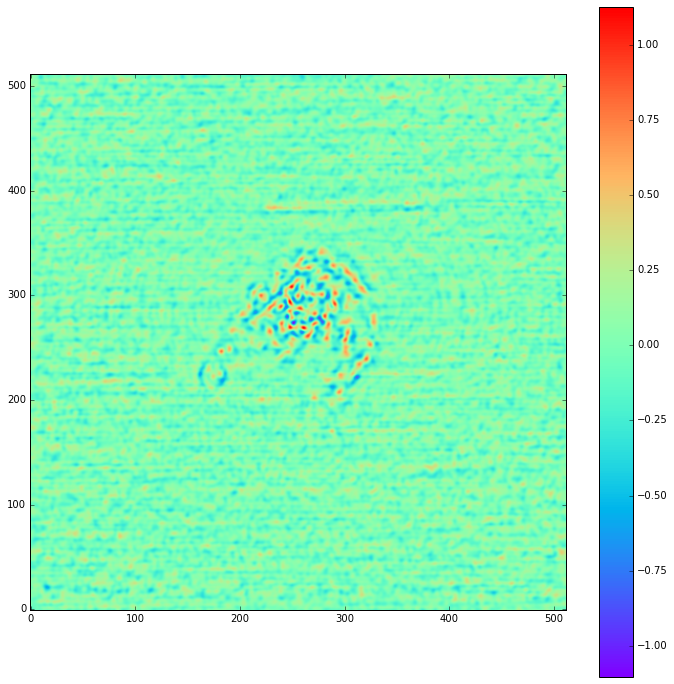

End of major cycle
Start of major cycle 5
Peak of PSF = 1.0 at (256, 256)
Peak of Dirty = 1.1266888775 at (269, 260)
Coupling matrix =
 [[ 1.          0.90103941  0.42579056  0.06085272]
 [ 0.90103941  0.81851015  0.40781147  0.06062136]
 [ 0.42579056  0.40781147  0.28501974  0.05855841]
 [ 0.06085272  0.06062136  0.05855841  0.03997746]]
Max abs in dirty image = 1.126689
Start of minor cycle
This minor cycle will stop at 100 iterations or peak < 0.11266888775
Minor cycle 0, peak [-0.15915203 -0.12952475  0.01233083  0.08170852] at [283, 302, 3]
Minor cycle 1, peak [-0.09291193 -0.08794974 -0.07623978 -0.07080298] at [315, 376, 3]
Minor cycle 2, peak [-0.01171536 -0.00784701 -0.00323737 -0.06805438] at [26, 49, 3]
Minor cycle 3, peak [ 0.1504834   0.15273544  0.15108592  0.06752074] at [46, 95, 3]
Minor cycle 4, peak [ 0.00322711 -0.00526376 -0.0350601  -0.06628627] at [430, 109, 3]
Minor cycle 5, peak [ 0.6387386   0.58599779  0.2989709   0.06462437] at [289, 228, 3]
Minor cycle 6, pe

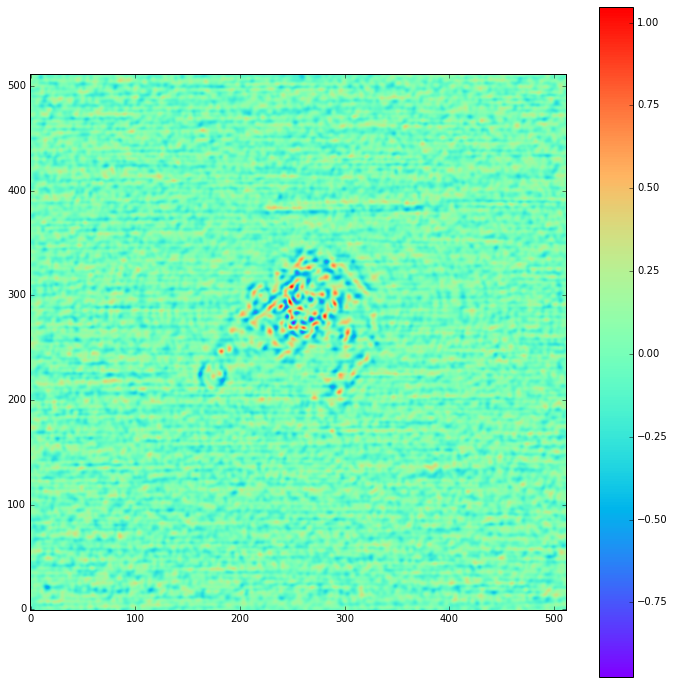

End of major cycle
Start of major cycle 6
Peak of PSF = 1.0 at (256, 256)
Peak of Dirty = 1.03942773415 at (308, 249)
Coupling matrix =
 [[ 1.          0.90103941  0.42579056  0.06085272]
 [ 0.90103941  0.81851015  0.40781147  0.06062136]
 [ 0.42579056  0.40781147  0.28501974  0.05855841]
 [ 0.06085272  0.06062136  0.05855841  0.03997746]]
Max abs in dirty image = 1.039428
Start of minor cycle
This minor cycle will stop at 100 iterations or peak < 0.103942773415
Minor cycle 0, peak [-0.13078071 -0.13240799 -0.12831669 -0.07296439] at [335, 276, 3]
Minor cycle 1, peak [-0.07437529 -0.05726051  0.00574156  0.05566873] at [245, 461, 3]
Minor cycle 2, peak [-0.42009263 -0.38536255 -0.18539619 -0.05560228] at [315, 250, 3]
Minor cycle 3, peak [-0.01742762 -0.01255927  0.03822442  0.05579639] at [324, 329, 3]
Minor cycle 4, peak [ 0.64618769  0.61129375  0.39384288  0.03608396] at [303, 291, 2]
Minor cycle 5, peak [ 1.09209949  0.98059566  0.39411871  0.02983878] at [308, 249, 2]
Minor cycle

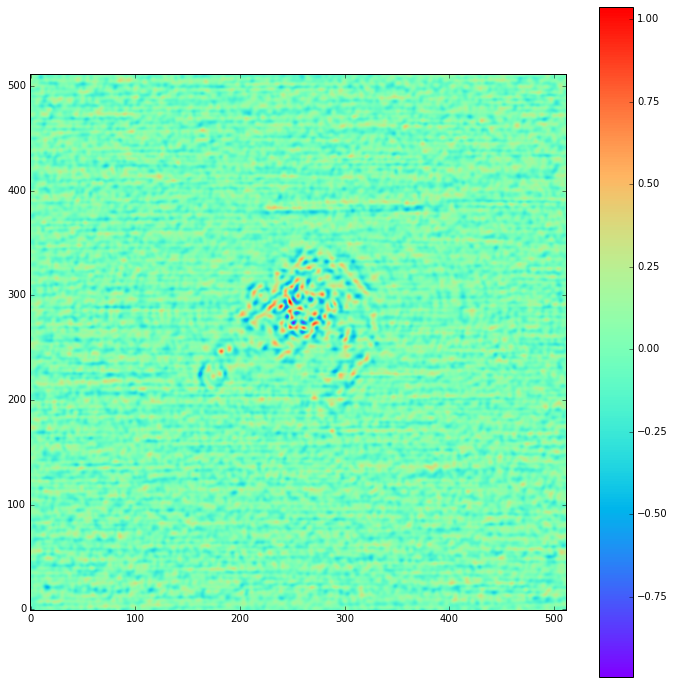

End of major cycle
Start of major cycle 7
Peak of PSF = 1.0 at (256, 256)
Peak of Dirty = 1.03269981461 at (294, 247)
Coupling matrix =
 [[ 1.          0.90103941  0.42579056  0.06085272]
 [ 0.90103941  0.81851015  0.40781147  0.06062136]
 [ 0.42579056  0.40781147  0.28501974  0.05855841]
 [ 0.06085272  0.06062136  0.05855841  0.03997746]]
Max abs in dirty image = 1.032700
Start of minor cycle
This minor cycle will stop at 100 iterations or peak < 0.103269981461
Minor cycle 0, peak [-0.1639097  -0.15277874 -0.06506793  0.07045589] at [298, 235, 3]
Minor cycle 1, peak [-0.09807703 -0.10479357 -0.10716661 -0.04872589] at [251, 486, 3]
Minor cycle 2, peak [ 0.11209232  0.10503146  0.06496337  0.04789073] at [28, 179, 3]
Minor cycle 3, peak [-0.19088031 -0.17695912 -0.08851984  0.04775238] at [108, 421, 3]
Minor cycle 4, peak [ 0.06110628  0.06522299  0.08517789  0.04728313] at [396, 209, 3]
Minor cycle 5, peak [-0.02546688 -0.02578292 -0.04716877 -0.04593755] at [506, 18, 3]
Minor cycle 6

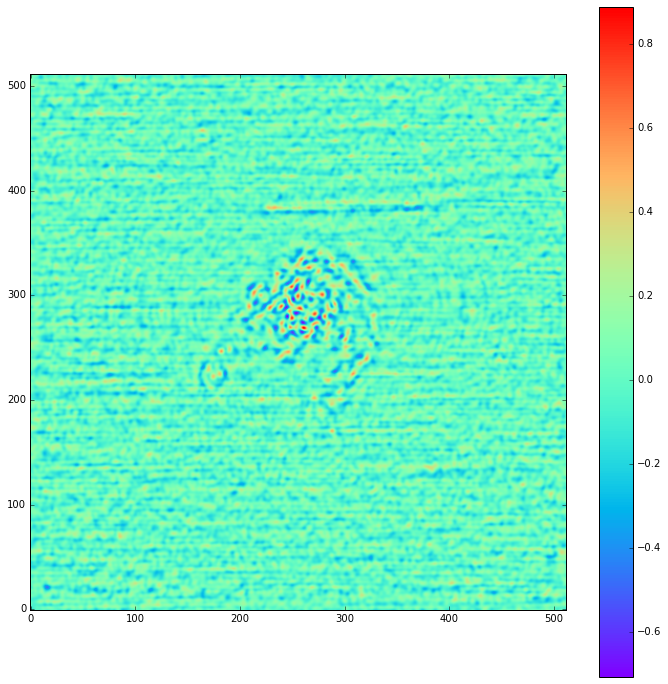

End of major cycle
Start of major cycle 8
Peak of PSF = 1.0 at (256, 256)
Peak of Dirty = 0.881639949262 at (269, 260)
Coupling matrix =
 [[ 1.          0.90103941  0.42579056  0.06085272]
 [ 0.90103941  0.81851015  0.40781147  0.06062136]
 [ 0.42579056  0.40781147  0.28501974  0.05855841]
 [ 0.06085272  0.06062136  0.05855841  0.03997746]]
Max abs in dirty image = 0.881640
Start of minor cycle
This minor cycle will stop at 100 iterations or peak < 0.0881639949262
Minor cycle 0, peak [-0.04584022 -0.04309474 -0.02504783  0.04168606] at [121, 269, 3]
Minor cycle 1, peak [-0.09819724 -0.10116259 -0.10739839 -0.04152384] at [432, 22, 3]
Minor cycle 2, peak [-0.14110298 -0.13021162 -0.06928839 -0.04136917] at [25, 302, 3]
Minor cycle 3, peak [ 0.16718112  0.14813023  0.08071917  0.04104914] at [421, 409, 3]
Minor cycle 4, peak [ 0.66962281  0.61714258  0.2898716  -0.00089562] at [282, 270, 2]
Minor cycle 5, peak [-0.18724945 -0.16149947 -0.01774914 -0.04895415] at [286, 269, 3]
Minor cycle

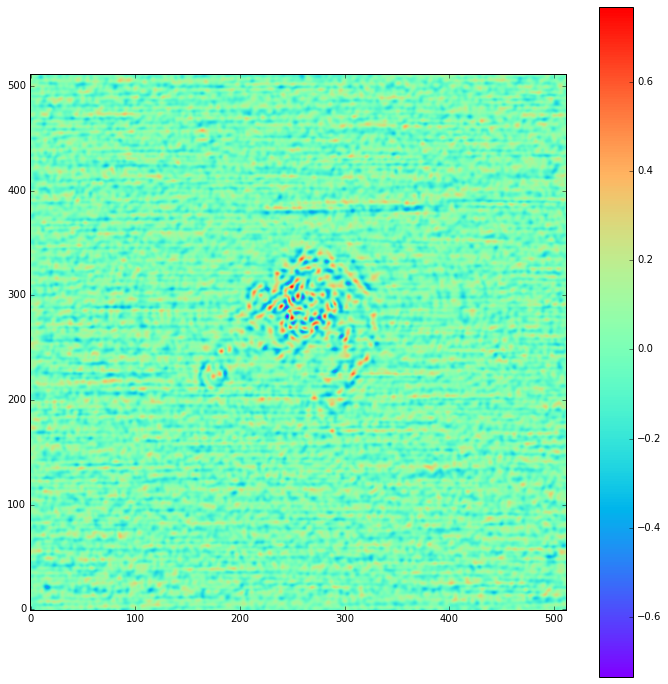

End of major cycle
Start of major cycle 9
Peak of PSF = 1.0 at (256, 256)
Peak of Dirty = 0.775124633386 at (278, 249)
Coupling matrix =
 [[ 1.          0.90103941  0.42579056  0.06085272]
 [ 0.90103941  0.81851015  0.40781147  0.06062136]
 [ 0.42579056  0.40781147  0.28501974  0.05855841]
 [ 0.06085272  0.06062136  0.05855841  0.03997746]]
Max abs in dirty image = 0.775125
Start of minor cycle
This minor cycle will stop at 100 iterations or peak < 0.0775124633386
Minor cycle 0, peak [ 0.17210235  0.15104102  0.07906894  0.03915735] at [193, 58, 3]
Minor cycle 1, peak [ 0.09688314  0.08885819  0.06495417  0.03829867] at [412, 99, 3]
Minor cycle 2, peak [ 0.06000658  0.05509081  0.0202784  -0.03822781] at [151, 328, 3]
Minor cycle 3, peak [ 0.08662541  0.08921157  0.09490834  0.03717442] at [19, 100, 3]
Minor cycle 4, peak [ 0.183206    0.16200486  0.06109676  0.03653144] at [68, 464, 3]
Minor cycle 5, peak [ 0.11079344  0.11035563  0.07980587  0.03632562] at [494, 289, 3]
Minor cycle 6

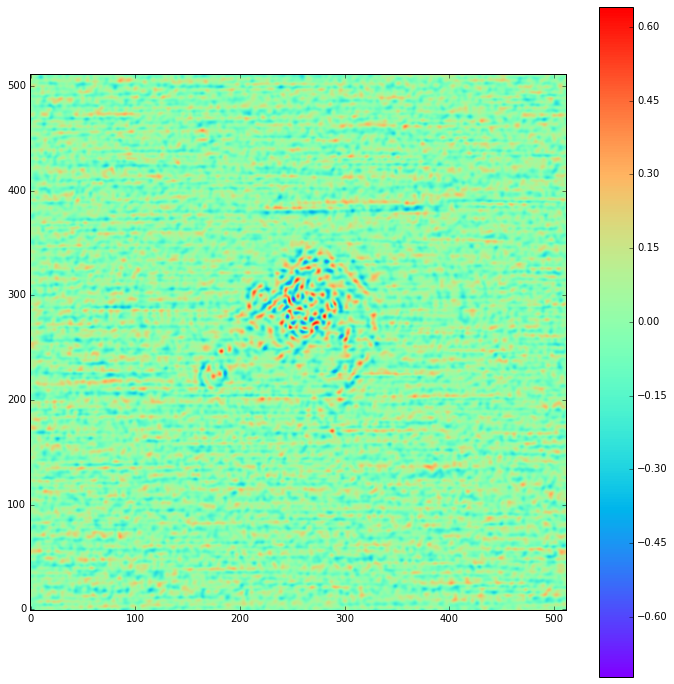

End of major cycle
End of major cycles


In [11]:
scales=[0, 3, 10, 30]
ps, vs, m31cc, m31res=majorcycle(2.0*theta, lam, uvwsort, vobs, 0.75, 10, 100, 200, scales, 0.001, 0.1)

Finally show the results

Total flux in model 1563.316139 Jy


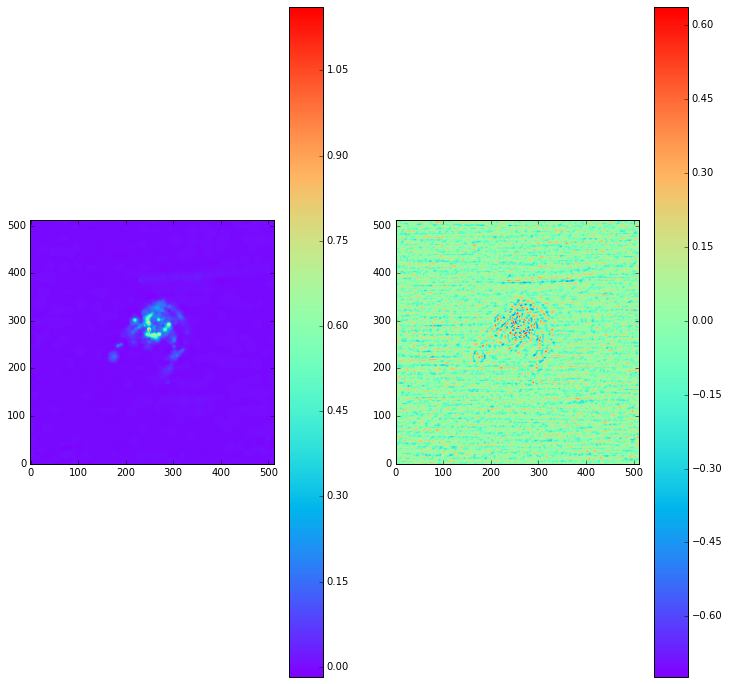

In [12]:
print("Total flux in model %.6f Jy" % numpy.sum(m31cc))
plt.clf()
plt.subplot(1,2,1)
plt.imshow(m31cc, cmap='rainbow', origin='lower')
c=plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(m31res, cmap='rainbow', origin='lower')
c=plt.colorbar()




Now plot the residual visibility to see if it is noise-like

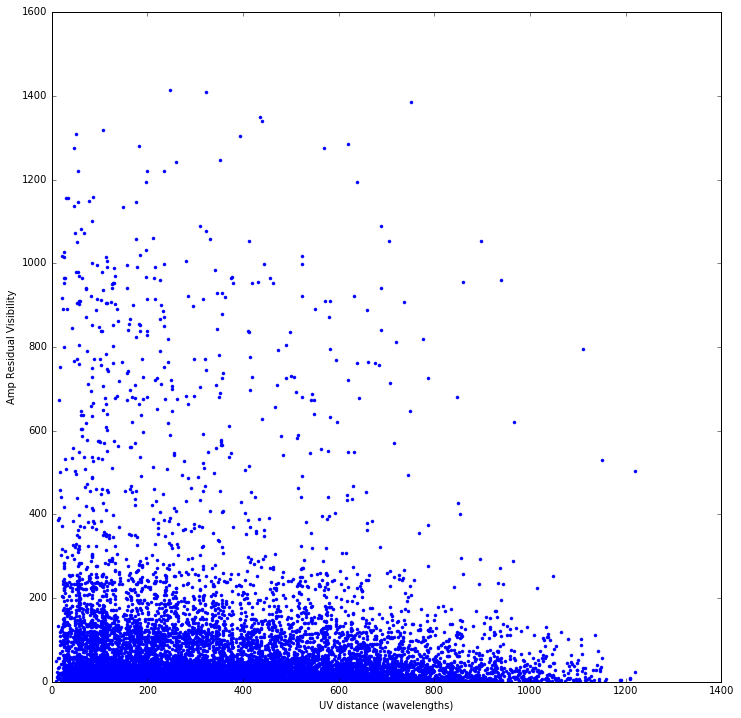

In [13]:
plt.clf()
plt.plot(uvdist, numpy.abs(vs), '.')
plt.xlabel('UV distance (wavelengths)')
plt.ylabel('Amp Residual Visibility')
plt.show()

In [ ]:
Plot against visibility sequence (a proxy for time) to see if the errors are more easily seen

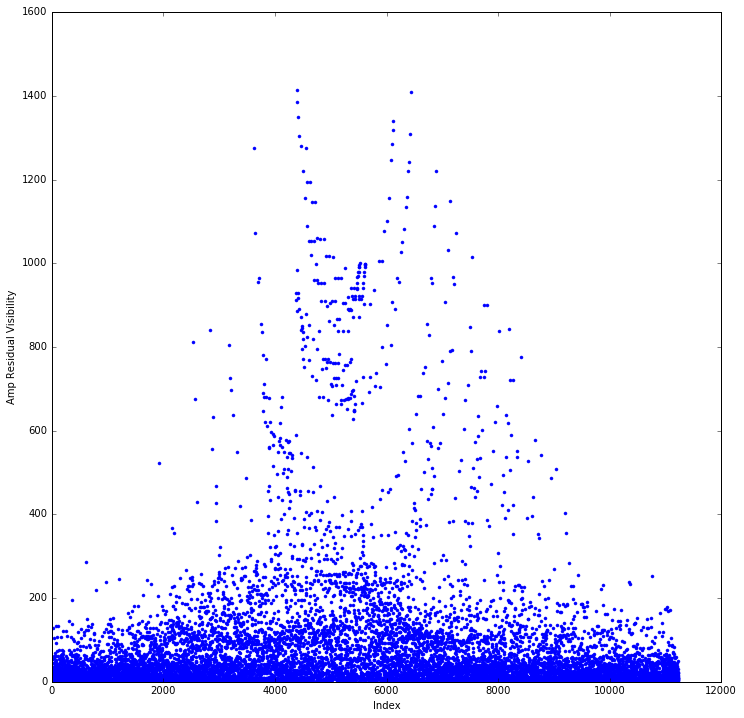

In [14]:
plt.clf()
plt.plot(numpy.abs(vs), '.')
plt.xlabel('Index')
plt.ylabel('Amp Residual Visibility')
plt.show()

It seems as though the maximum errors are correlated with zenith angle